In [1]:
import numpy as np 
import astropy.constants as c
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import math
#list all the constants used
G=c.G.value
M_sun=c.M_sun.value
M_earth=c.M_earth.value
R_sun=c.R_sun.value
R_earth=c.R_earth.value
hour=3600 #s
day=3600*24
e=0.1
t_LC=1765.5 #s
t_obs=17*90

def delta(Rp, Rs):
    delta = (Rp*R_earth / (Rs*R_sun))**2*1e6
    return delta

def SNR(delta,n,sigma_s):
    SNR=delta*n**0.5/sigma_s
    return SNR

def sigma_s(t, sigma_LC, cdppindex): #t/hour
    t_LC=1765.5/hour 

    return sigma_LC*(t/t_LC)**cdppindex

def t_dur(P,Rs,e,a): #hour
    t_dur = P*day*Rs*R_sun*(1-e**2)/(np.pi*a)/hour
    return t_dur

def a(Ms,P):
    a=((G*Ms*M_sun*(P*day)**2)/(4*np.pi**2))**(1/3)
    return a 

def n(t_obs,P): # the unite of t_obs and P is day
    n=t_obs/P
    return n

def f_n(t_obs,P):
    if t_obs <=2*P:
        return 0
    if t_obs> 2*P and t_obs< 3*P:
        return (t_obs/P-2)
    if t_obs>=3*P:
        return 1
    
def f_eff(SNR):
    if SNR <=6:
        return 0
    if SNR >6 and SNR<=12:
        return (SNR-6)/6
    if SNR>12:
        return 1
    
def f_geo(Rp,Rs,a,e):
    f_geo = (Rp*R_earth+Rs*R_sun)/(a*(1-e**2))
    return f_geo

3927.490170827554 0.0057602961537602535


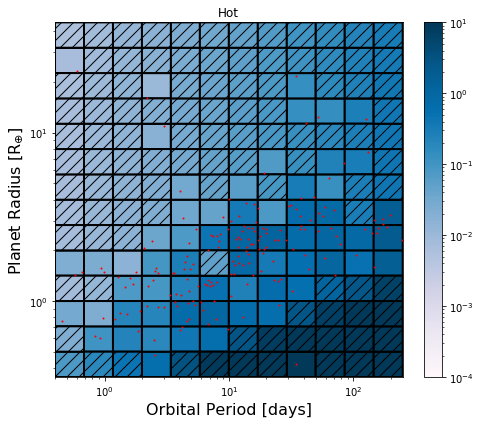

In [2]:
from matplotlib.colors import LogNorm
################
#2sigma hot no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_2sigma_hot.csv',sep=',')
data=pd.read_csv('result/occurrence_rate_2sigma_hot_cell_nofp_cp.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Hot')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_2sigma_hot_cell_nofp.png',dpi=300)
plt.show()

981.872542706888 0.000493444152946978


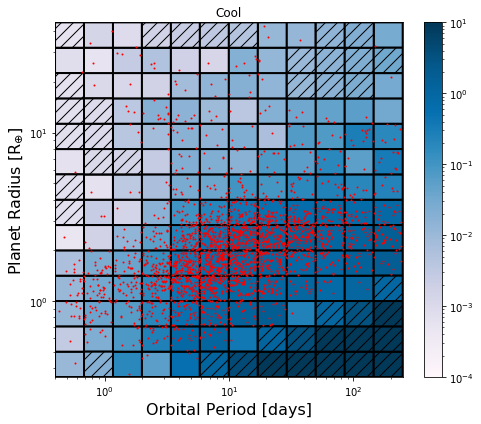

In [3]:
################
#2sigma cool no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_2sigma_cool.csv',sep=',')

data=pd.read_csv('result/occurrence_rate_2sigma_cool_cell_nofp.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Cool')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_2sigma_cool_cell_nofp.png',dpi=300)
plt.show()

[[1.00000000e-05 1.00000000e-05 1.00000000e-05 1.08189113e+01
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 4.66841250e+00 2.92152474e+00 7.14403330e-01
  4.59430522e-01 5.66351206e-01 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [2.70730232e+00 5.86855940e-01 3.40815347e+00 1.09824765e+00
  1.37389281e+00 9.76812544e-01 5.30545612e-01 3.23404066e-01
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 1.00000000e-05 1.31343739e+00 5.10057832e-01
  5.07537356e-01 6.87505507e-01 2.81398121e-01 6.61192475e-01
  5.09636055e-01 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [3.78349555e+00 9.95420127e-01 4.17277163e-01 7.15896026e-01
  6.94004256e-01 1.00000000e-05 9.63821851e-01 3.33885689e-01
  6.38608319e-01 1.23789209e+00 4.00881462e-01 9.87616344e-01]
 [1.00000000e-05 1.00000000e-05 1.00000000e-05 6.55187761e-01
  3

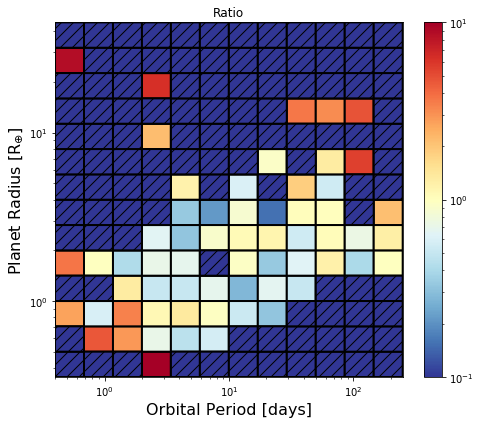

In [4]:
################
#2sigma hot cool ratio and difference 
################
stellar_table1=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table1=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_2sigma_hot.csv',sep=',')
data1=pd.read_csv('result/occurrence_rate_2sigma_hot_cell_nofp_cp.csv')

occurrence_cell1=np.zeros((14,12))
std_cell1=np.zeros((14,12))
count_cell1=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell1[i,j]=data1['occurrence_cell'][i*12+j]
        std_cell1[i,j]=data1['std_cell'][i*12+j]
        count_cell1[i,j]=data1['count_cell'][i*12+j]
        
        
        
stellar_table2=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table2=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_2sigma_cool.csv',sep=',')
data2=pd.read_csv('result/occurrence_rate_2sigma_cool_cell_nofp.csv')
occurrence_cell2=np.zeros((14,12))
std_cell2=np.zeros((14,12))
count_cell2=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell2[i,j]=data2['occurrence_cell'][i*12+j]
        std_cell2[i,j]=data2['std_cell'][i*12+j]
        count_cell2[i,j]=data2['count_cell'][i*12+j]

x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        if count_cell1[i,j]!=0 and count_cell2[i,j]!=0:
            z[i,j]=occurrence_cell1[i,j]/occurrence_cell2[i,j]
        else:
            z[i,j]=1e-5

print(z)
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=0.1, vmax=10),cmap='RdYlBu_r',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell1[i,j]==0 or count_cell2[i,j]==0:
            zz[0,0]=1e-5
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=0.1, vmax=10),hatch='//',cmap='RdYlBu_r',edgecolors='k',linewidth=2)
            

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


#ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Ratio')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_2sigma_hot_cool_ratio_cell_nofp.png',dpi=300)
plt.show()


[[ 0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 1.  2.  2.  3.  3.  1.  0.  0.  0.  0.  0.  0.]
 [ 2.  4.  5.  8. 10.  5.  2.  3.  0.  0.  0.  0.]
 [ 4.  0.  7. 13. 16. 16.  9.  6.  3.  1.  0.  0.]
 [ 3.  6.  3. 11. 18. 16. 19. 11.  9.  4.  3.  3.]
 [ 0.  0.  0.  4.  6. 23. 29. 22. 12. 12.  4.  5.]
 [ 0.  0.  0.  2.  4.  6.  8.  8.  9.  7.  1.  6.]
 [ 0.  0.  0.  0.  2.  1.  2.  1.  4.  2.  1.  0.]
 [ 0.  0.  0.  0.  2.  0.  1.  2.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  2.  1.]
 [ 0.  0.  0.  1.  0.  1.  0.  0.  1.  0.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]]
1963.745085413777 0.002471544031392076


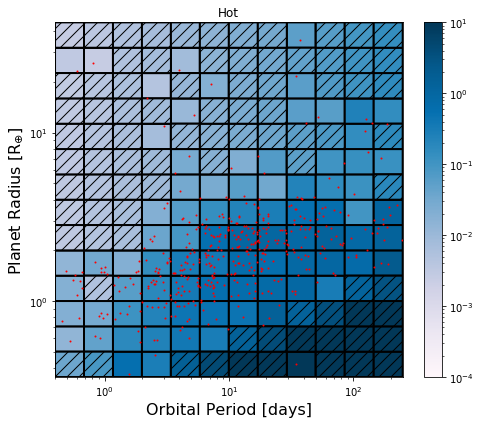

In [5]:
from matplotlib.colors import LogNorm
################
#1.5sigma hot no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1d5sigma_hot.csv',sep=',')
data=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_1d5sigma_hot_cell_nofp_cp.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]

print(count_cell)
x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Hot')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1d5sigma_hot_cell_nofp.png',dpi=300)
plt.show()

1963.745085413776 0.00056525358586049


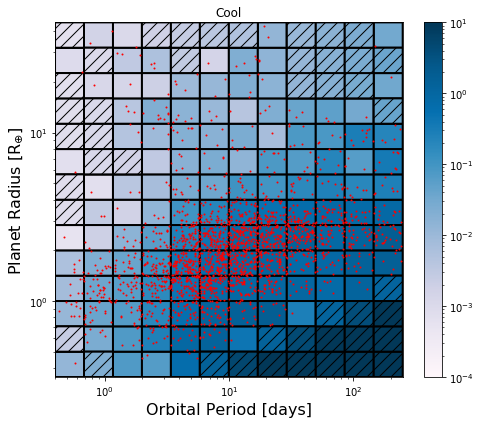

In [6]:
from matplotlib.colors import LogNorm
################
#1.5sigma cool no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1d5sigma_cool.csv',sep=',')
data=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_1d5sigma_cool_cell_nofp_new.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Cool')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1d5sigma_cool_cell_nofp.png',dpi=300)
plt.show()

[[1.00000000e-05 1.00000000e-05 7.93707441e+00 4.58965784e+00
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 1.86996429e+00 2.54147443e+00 9.95924148e-01
  4.10056953e-01 2.38770721e-01 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.81892237e+00 7.57009119e-01 1.67427697e+00 1.21437336e+00
  7.70492766e-01 3.97442580e-01 3.15481352e-01 7.93743722e-01
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [2.42972112e+00 1.00000000e-05 1.00238464e+00 1.08916217e+00
  7.37950864e-01 7.36061981e-01 7.49537421e-01 7.97190070e-01
  9.13725540e-01 4.05069516e-01 1.00000000e-05 1.00000000e-05]
 [2.35306752e+00 1.48576371e+00 5.04156444e-01 1.15103676e+00
  7.59154044e-01 5.62808110e-01 7.44376497e-01 5.67741720e-01
  1.15032146e+00 1.10739383e+00 5.39461065e-01 1.40051028e+00]
 [1.00000000e-05 1.00000000e-05 1.00000000e-05 6.52299215e-01
  3

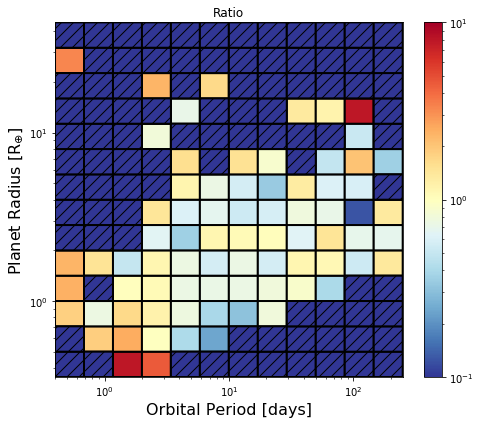

In [7]:
###############
#1.5sigma hot cool ratio and difference 
################
stellar_table1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1d5sigma_hot.csv',sep=',')
data1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_1d5sigma_hot_cell_nofp_cp.csv')

occurrence_cell1=np.zeros((14,12))
std_cell1=np.zeros((14,12))
count_cell1=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell1[i,j]=data1['occurrence_cell'][i*12+j]
        std_cell1[i,j]=data1['std_cell'][i*12+j]
        count_cell1[i,j]=data1['count_cell'][i*12+j]
        
        
        
stellar_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1d5sigma_cool.csv',sep=',')
data2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1.5sigma/result/occurrence_rate_1d5sigma_cool_cell_nofp_new.csv')
occurrence_cell2=np.zeros((14,12))
std_cell2=np.zeros((14,12))
count_cell2=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell2[i,j]=data2['occurrence_cell'][i*12+j]
        std_cell2[i,j]=data2['std_cell'][i*12+j]
        count_cell2[i,j]=data2['count_cell'][i*12+j]

x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        if count_cell1[i,j]!=0 and count_cell2[i,j]!=0:
            z[i,j]=occurrence_cell1[i,j]/occurrence_cell2[i,j]
        else:
            z[i,j]=1e-5

print(z)
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=0.1, vmax=10),cmap='RdYlBu_r',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell1[i,j]==0 or count_cell2[i,j]==0:
            zz[0,0]=1e-5
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=0.1, vmax=10),hatch='//',cmap='RdYlBu_r',edgecolors='k',linewidth=2)
            

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


#ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Ratio')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1d5sigma_hot_cool_ratio_cell_nofp.png',dpi=300)
plt.show()


981.8725427068885 0.0011441060454672194


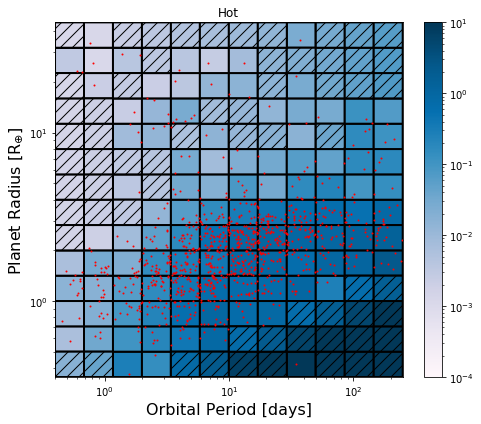

In [9]:
from matplotlib.colors import LogNorm
################
#1sigma hot no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1sigma_hot.csv',sep=',')
data=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_1sigma_hot_cell_nofp_cp.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Hot')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1sigma_hot_cell_nofp.png',dpi=300)
plt.show()

3927.490170827552 0.0008024251578175988


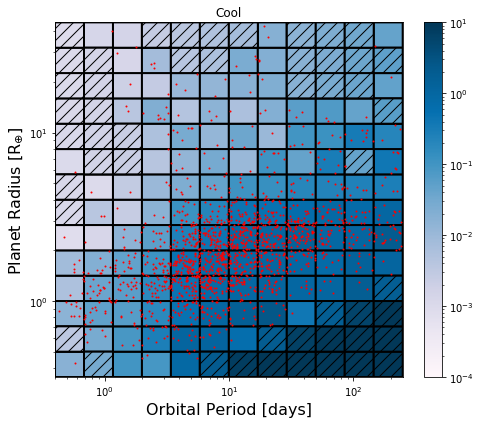

In [10]:
from matplotlib.colors import LogNorm
################
#1.5sigma cool no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1sigma_cool.csv',sep=',')
data=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_1sigma_cool_cell_nofp_new.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Cool')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1sigma_cool_cell_nofp.png',dpi=300)
plt.show()

[[1.00000000e-05 1.00000000e-05 2.74034693e+00 1.61358051e+00
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 1.19042642e+00 1.18702103e+00 7.32755651e-01
  3.58146746e-01 7.52591922e-01 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [6.03810804e-01 4.01043611e-01 1.43925301e+00 1.24784319e+00
  1.17800538e+00 9.85624853e-01 4.31601703e-01 3.41010252e-01
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [2.73595231e+00 4.62230693e-01 1.06483748e+00 9.25343664e-01
  8.04970902e-01 8.71103803e-01 6.93327007e-01 6.31054701e-01
  9.95253541e-01 2.52376945e-01 1.00000000e-05 1.00000000e-05]
 [7.68327137e-01 1.42037023e+00 4.57702255e-01 1.30701083e+00
  5.95558834e-01 4.83068100e-01 1.04695991e+00 8.57964493e-01
  7.12955765e-01 1.27487441e+00 8.33983255e-01 2.10458704e+00]
 [1.00000000e-05 1.59235983e+00 5.47810830e-01 9.37273810e-01
  6

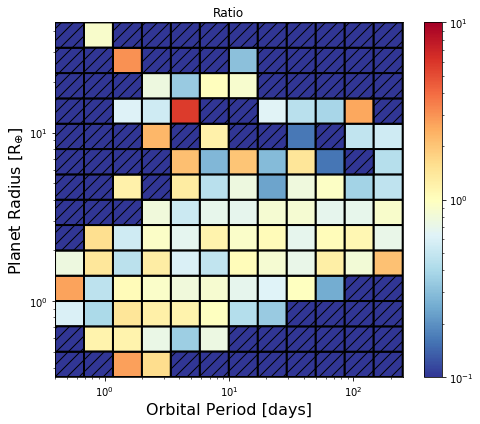

In [11]:
###############
#1sigma hot cool ratio and difference 
################
stellar_table1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1sigma_hot.csv',sep=',')
data1=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_1sigma_hot_cell_nofp_cp.csv')

occurrence_cell1=np.zeros((14,12))
std_cell1=np.zeros((14,12))
count_cell1=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell1[i,j]=data1['occurrence_cell'][i*12+j]
        std_cell1[i,j]=data1['std_cell'][i*12+j]
        count_cell1[i,j]=data1['count_cell'][i*12+j]
        
        
        
stellar_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1sigma_cool.csv',sep=',')
data2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_1sigma_cool_cell_nofp_new.csv')
occurrence_cell2=np.zeros((14,12))
std_cell2=np.zeros((14,12))
count_cell2=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell2[i,j]=data2['occurrence_cell'][i*12+j]
        std_cell2[i,j]=data2['std_cell'][i*12+j]
        count_cell2[i,j]=data2['count_cell'][i*12+j]

x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        if count_cell1[i,j]!=0 and count_cell2[i,j]!=0:
            z[i,j]=occurrence_cell1[i,j]/occurrence_cell2[i,j]
        else:
            z[i,j]=1e-5

print(z)
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=0.1, vmax=10),cmap='RdYlBu_r',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell1[i,j]==0 or count_cell2[i,j]==0:
            zz[0,0]=1e-5
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=0.1, vmax=10),hatch='//',cmap='RdYlBu_r',edgecolors='k',linewidth=2)
            

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


#ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Ratio')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_1sigma_hot_cool_ratio_cell_nofp.png',dpi=300)
plt.show()


[[1.00000000e-05 1.00000000e-05 1.00000000e-05 6.89584904e+00
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 3.78976953e+00 2.68164416e+00 6.49312849e-01
  3.49020162e-01 5.28565303e-01 1.00000000e-05 1.00000000e-05
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.94544480e+00 4.52884620e-01 3.32782174e+00 1.20797772e+00
  1.43107759e+00 9.76650092e-01 4.10996400e-01 2.41418085e-01
  1.00000000e-05 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [1.00000000e-05 1.00000000e-05 1.31531219e+00 5.16067424e-01
  4.86268613e-01 6.68791158e-01 2.62151590e-01 5.71572634e-01
  5.36423625e-01 1.00000000e-05 1.00000000e-05 1.00000000e-05]
 [2.73487366e+00 1.17900524e+00 3.35202789e-01 8.32682405e-01
  5.87097924e-01 1.00000000e-05 9.87222461e-01 3.33589902e-01
  5.77367165e-01 1.35723021e+00 3.92364646e-01 1.51768326e+00]
 [1.00000000e-05 1.00000000e-05 1.00000000e-05 6.56976929e-01
  2

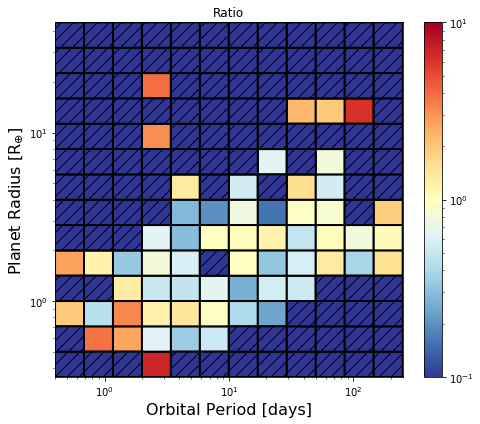

In [12]:
###############
#2sigma hot 1sigma cool ratio and difference 
################
stellar_table1=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_hot_2020.csv',sep=',')
koi_table1=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_2sigma_hot.csv',sep=',')
data1=pd.read_csv('result/occurrence_rate_2sigma_hot_cell_nofp_cp.csv')

occurrence_cell1=np.zeros((14,12))
std_cell1=np.zeros((14,12))
count_cell1=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell1[i,j]=data1['occurrence_cell'][i*12+j]
        std_cell1[i,j]=data1['std_cell'][i*12+j]
        count_cell1[i,j]=data1['count_cell'][i*12+j]
        
        
        
stellar_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_stellar_q17_add_dispersions_reduction_reduction_cool_2020.csv',sep=',')
koi_table2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/data/kepler_koi_q17_add_dispersions_reduction_reduction_1sigma_cool.csv',sep=',')
data2=pd.read_csv('/media/dyz/dyz/mywork/gaia_kepler/script/kepler_candidates_2d/main_sequence_1sigma/result/occurrence_rate_1sigma_cool_cell_nofp_new.csv')
occurrence_cell2=np.zeros((14,12))
std_cell2=np.zeros((14,12))
count_cell2=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell2[i,j]=data2['occurrence_cell'][i*12+j]
        std_cell2[i,j]=data2['std_cell'][i*12+j]
        count_cell2[i,j]=data2['count_cell'][i*12+j]

x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        if count_cell1[i,j]!=0 and count_cell2[i,j]!=0:
            z[i,j]=occurrence_cell1[i,j]/occurrence_cell2[i,j]
        else:
            z[i,j]=1e-5

print(z)
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=0.1, vmax=10),cmap='RdYlBu_r',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell1[i,j]==0 or count_cell2[i,j]==0:
            zz[0,0]=1e-5
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=0.1, vmax=10),hatch='//',cmap='RdYlBu_r',edgecolors='k',linewidth=2)
            

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


#ax0.scatter(nofp_period,nofp_rp,c='red',s=1)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Ratio')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_2sigma_hot_1sigma_cool_ratio_cell_nofp.png',dpi=300)
plt.show()


981.8725427068885 0.0004504156592234126


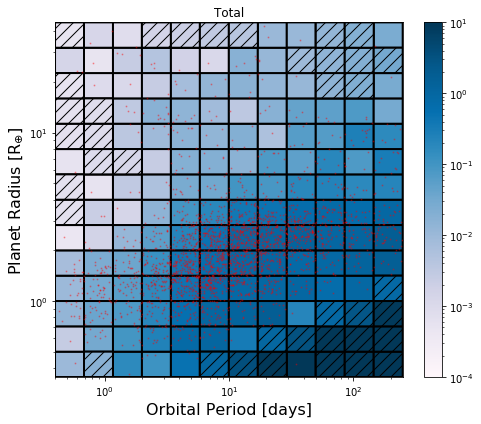

In [13]:
from matplotlib.colors import LogNorm
################
#2sigma hot no false positive
################

bins_period=np.logspace(math.log(0.4,5),math.log(250,5),13,base=5)
bins_radius=np.logspace(-1.5,5.5,15,base=2)
occurrence_cell=np.zeros((14,12))

stellar_table=pd.read_csv('data/kepler_stellar_q17_add_dispersions_reduction_reduction_2020.csv',sep=',')
koi_table=pd.read_csv('data/kepler_koi_q17_add_dispersions_reduction_reduction_new.csv',sep=',')
data=pd.read_csv('result/occurrence_rate_2sigma_tot_cell_nofp_cp.csv')

nofp_period=[]
nofp_rp=[]
fp_period=[]
fp_rp=[]
for i in range(0,len(koi_table)):
    if koi_table['koi_disposition'][i]!='FALSE POSITIVE':
        nofp_period.append(koi_table['koi_period'][i])
        nofp_rp.append(koi_table['koi_prad'][i])
    else:
        fp_period.append(koi_table['koi_period'][i])
        fp_rp.append(koi_table['koi_prad'][i])
#print(data)
occurrence_cell=np.zeros((14,12))
std_cell=np.zeros((14,12))
count_cell=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        occurrence_cell[i,j]=data['occurrence_cell'][i*12+j]
        std_cell[i,j]=data['std_cell'][i*12+j]
        count_cell[i,j]=data['count_cell'][i*12+j]


x,y=np.meshgrid(bins_period,bins_radius)
z=np.zeros((14,12))
for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
#        if occurrence_cell[i,j]==0:
#            z[i,j]=occurrence_cell[i,j]+1
#        else:
        z[i,j]=occurrence_cell[i,j]

print(max(data['occurrence_cell']),min(data['occurrence_cell']))
fig=plt.figure(figsize=(7,6))
ax0=fig.add_subplot(111)
c0=ax0.pcolor(x,y,z,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',edgecolors='k',linewidth=2)

for i in range(0,len(bins_radius)-1):
    for j in range(0,len(bins_period)-1):
        xx=bins_period[j:j+2]
        yy=bins_radius[i:i+2]
        zz=np.zeros((1,1))
        if count_cell[i,j]==0:
            zz[0,0]=occurrence_cell[i,j]
            ax0.pcolor(xx,yy,zz,norm=LogNorm(vmin=1e-4, vmax=10),cmap='PuBu',hatch='//',edgecolors='k',linewidth=2)

ax0.set_xlabel('Orbital Period [days]',fontsize=16)
ax0.set_ylabel('Planet Radius [R$_{\oplus}$]',fontsize=16)
ax0.set_xscale('log')
ax0.set_yscale('log')


ax0.scatter(nofp_period,nofp_rp,c='red',s=1,alpha=0.3)
#ax0.scatter(fp_period,fp_rp,c='yellow',s=3)
ax0.set_title('Total')
ax0.set_xlim(0.4,250)
ax0.set_ylim(2**(-1.5),2**5.5)
fig.colorbar(c0, ax=ax0)
fig.tight_layout()
plt.savefig('result/occurrence_rate_2sigma_tot_cell_nofp.png',dpi=300)
plt.show()